<div>
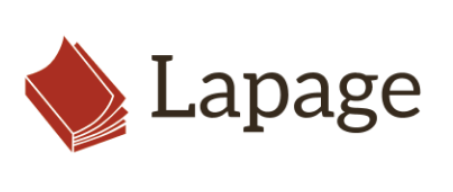
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_p6_final.csv',index_col = 0)

Je retire mes 4 clients afin de ne pas biaiser les résultats de mes tests de corrélation.

In [3]:
df_4_clients = df.loc[(df['client_id'] == 'c_1609')|(df['client_id'] == 'c_4958')|(df['client_id'] == 'c_6714')|(df['client_id'] == 'c_3454')]

In [4]:
df.drop( df[ (df['client_id'] == 'c_1609')|(df['client_id'] == 'c_4958')|(df['client_id'] == 'c_6714')|(df['client_id'] == 'c_3454')].index, inplace=True)

# Test de corrélation : Sexe et Catégorie 

Mes deux variables sont qualitatives.  
Je choisie de réaliser le test du Khi² pour vérifier si ces deux variables sont liées.

In [5]:
# Création de ma table de contingence
X = "sex"
Y = "categ"

cont_1 = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1


categ,0,1,2,Total
sex,,,,
f,200904,111331,16980,329215
m,186589,101017,15868,303474
Total,387493,212348,32848,632689


In [6]:
# J'ouvre le module chi2_contingency de la librairie scipy
from scipy.stats import chi2_contingency as chi2_contingency

In [7]:
chi2, p, dof, exp = chi2_contingency(cont_1)

In [8]:
chi2

20.200173796862927

In [9]:
p

0.002551063708568263

Avec un p-value inférieure à 0.05% on peut rejeter l'hypothèse 0.  

**Attention, cette corrélation ne s'applique que si les 4 gros clients ont été retirés de la dataframe. Cas échéant, l'hypothèse H0 ne sera pas rejetée.**  

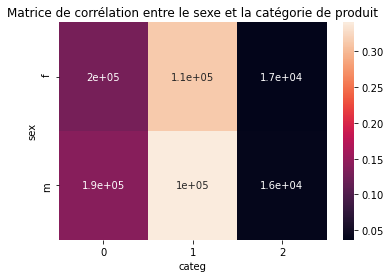

In [10]:
import seaborn as sns

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

On remarque une forte corrélation entre les hommes et la catégorie 1.

# Test de corrélation : Age et Chiffre d'affaires


Il s'agit de deux variables quantitatives mais non linéaires. J'utilise le test de Spearman.

In [11]:
df_age_ca = df[['âge','price']]

In [12]:
df_age_ca = df_age_ca.groupby('âge').agg({'price':'sum'}).reset_index()

In [13]:
df_age_ca

,âge,price
0,19,609013.69
1,20,178195.78
2,21,184209.24
3,22,178497.70
4,23,165029.24
...,...,...
71,90,5264.98
72,91,5043.19
73,92,2815.45
74,93,4013.87


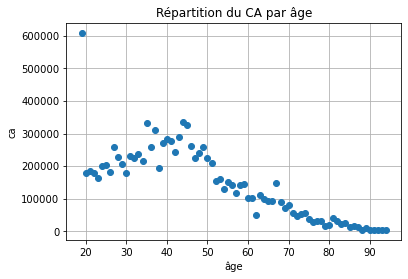

In [14]:
import matplotlib.pyplot as plt

plt.plot(df_age_ca["âge"],df_age_ca["price"],'o')
plt.xlabel("âge")
plt.ylabel("ca")
plt.grid()
plt.title('Répartition du CA par âge')
plt.show()

Ce graphique nous montre que nos variables ne sont pas linéaires.  

In [15]:
from scipy import stats
from scipy.stats import spearmanr

In [16]:
stats.spearmanr(df_age_ca['âge'],df_age_ca['price'])

SpearmanrResult(correlation=-0.8736842105263158, pvalue=7.352708223159905e-25)

Avec une p-value de 7.352708223159905e-25, on peut rejeter l'hypothèse 0 et dire que les variables sont anti-corrélées (-0.8736842105263158). 

# Test de corrélation : Age et fréquence d'achat

Mes variables sont qualitatives et quantitatives. Je réalise une analyse de la variance (ANOVA) comme test de corrélation.

In [17]:
# Je crée une colonne année_mois afin de calculer la fréquence d'achat mensuelle des clients par tranche d'âge 
df['mois'] = df["mois"].astype(str)

In [18]:
df['mois'] = df['mois'].str.rjust(2, '0')

In [19]:
df["année_mois"] = df["année"].astype(str)+ df["mois"].astype(str)

In [20]:
df.sort_values('date', ascending = True)

,id_prod,date,session_id,client_id,price,categ,sex,birth,année,mois,jour,âge,âge_tranche,année_mois
467519,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0,f,1967,2021,03,1,56,52-56,202103
244742,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0,m,1960,2021,03,1,63,62-67,202103
124034,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0,m,1988,2021,03,1,35,30-35,202103
110676,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0,f,1989,2021,03,1,34,30-35,202103
147366,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0,f,1956,2021,03,1,67,62-67,202103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450510,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,21.92,1,f,1996,2023,02,28,27,25-29,202302
453337,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,48.99,2,f,1994,2023,02,28,29,25-29,202302
196232,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,26.99,1,f,1985,2023,02,28,38,36-40,202302
470492,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,8.99,0,m,1953,2023,02,28,70,68-72,202302


In [21]:
# Je calcul la fréquence d'achat mensuelle par client
def frequence(x):
    d = {}
    d["frequence"] = (x['session_id'].count()/ x['client_id'].value_counts().count())
    return pd.Series(d, index=["frequence"])        

In [22]:
# Je les regroupe par période et par tranche d'âge
df_age_frequence = df.groupby(['année_mois','âge_tranche']).apply(frequence)

In [23]:
df_age_frequence

frequence
année_mois âge_tranche           
202103     19-24         2.657194
           25-29         2.573684
           30-35         5.907716
           36-40         6.866029
           41-45         6.384831
...                           ...
202302     68-72         2.937255
           73-77         3.124183
           78-83         3.092308
           84-88         2.629630
           89-94         3.125000

[336 rows x 1 columns]

In [24]:
df_age_frequence = df_age_frequence.reset_index()

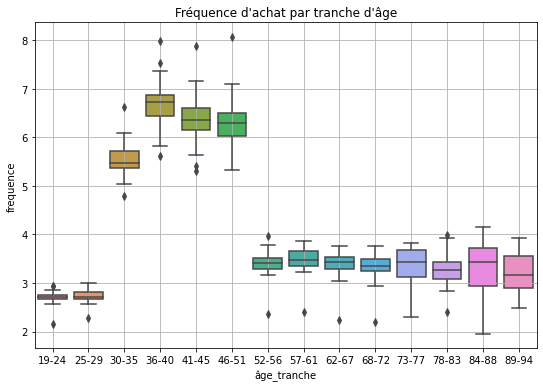

In [25]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='âge_tranche',y='frequence',data=df_age_frequence, showfliers=True)
plt.title('Fréquence d\'achat par tranche d\'âge')
plt.grid()
plt.show()

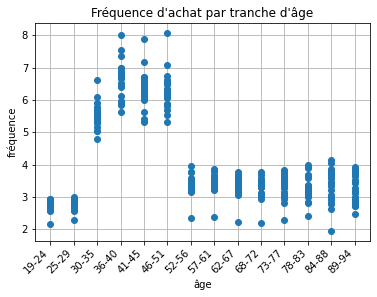

In [26]:
import matplotlib.pyplot as plt

plt.plot(df_age_frequence["âge_tranche"],df_age_frequence["frequence"],'o')
plt.xlabel("âge")
plt.ylabel("fréquence")
plt.xticks(rotation = 45,ha='right')
plt.title("Fréquence d'achat par tranche d'âge")
plt.grid()
plt.show()

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [28]:
lm = ols('frequence ~ âge_tranche', data = df_age_frequence).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)

In [29]:
table

,df,sum_sq,mean_sq,F,PR(>F)
âge_tranche,13.0,648.147853,49.857527,326.958346,1.079755e-176
Residual,322.0,49.101434,0.152489,NaN,NaN


In [30]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequence   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     327.0
Date:                Mon, 27 Sep 2021   Prob (F-statistic):          1.08e-176
Time:                        10:20:05   Log-Likelihood:                -153.66
No. Observations:                 336   AIC:                             335.3
Df Residuals:                     322   BIC:                             388.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.6982      0.080     33.850      0.000       2.541       2.855
âge_tranche[T.25-29]     0.0340      0.113      0.302      0.763      -0.188       0.256
âge_tranche[T.30-35]     2.8213      0.113     25.028      0.000       2.600       3.043
âge_tranche[T.36-40]     3.9754      0.113     35.266      0.000       3.754       4.197
âge_tranche[T.41-45]     3.6594      0.113     32.463      0.000       3.438       3.881
âge_tranche[T.46-51]     3.6038      0.113     31.969      0.000       3.382       3.826
âge_tranche[T.52-56]     0.6938      0.113      6.154      0.000       0.472       0.916
âge_tranche[T.57-61]     0.7887      0.113      6.997      0.000       0.567       1.010
âge_tranche[T.62-67]     0.6700      0.113      5.943      0.000       0.448       0.892
âge_tranche[T.68-72]     0.6113      0.113      5.422      0.000       0.389       0.833
âge_tranche[T.73-77]     0.6661      0.113      5.909      0.000       0.444       0.888
âge_tranche[T.78-83]     0.5876      0.113      5.213      0.000       0.366       0.809
âge_tranche[T.84-88]     0.6310      0.113      5.598      0.000       0.409       0.853
âge_tranche[T.89-94]     0.5305      0.113      4.706      0.000       0.309       0.752
==============================================================================
Omnibus:                       29.384   Durbin-Watson:                   0.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.192
Skew:                          -0.011   Prob(JB):                     3.25e-29
Kurtosis:                       6.061   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Avec un R_squared de 0.93, on peut dire qu'il existe à priori une relation entre l'âge et la fréquence d'achats.  

Avec un p-value inférieure à 0.05%, on peut rejeter l'hypothèse H0.

# Test de corrélation : Age et Panier moyen

R_squared : 0.93.  
Il existe à priori une relation entre l'âge et la fréquence d'achats.

Mes variables sont quantitatives et qualitatives.  
Je réalise une analyse de la variance (ANOVA) pour faire mon test.

In [31]:
# Je calcule le panier moyen mensuel
def panier_moyen(x):
    d = {}
    d["panier"] = (x['price'].sum()/ x['session_id'].count())
    return pd.Series(d, index=["panier"])

In [32]:
# Je les regroupe par période et par tranche d'âge
df_age_panier = df.groupby(['année_mois','âge_tranche']).apply(panier_moyen)

In [33]:
df_age_panier =  df_age_panier.reset_index()

In [34]:
df_age_panier

,année_mois,âge_tranche,panier
0,202103,19-24,38.636477
1,202103,25-29,36.713139
2,202103,30-35,15.751900
3,202103,36-40,13.242067
4,202103,41-45,13.279606
...,...,...,...
331,202302,68-72,17.222977
332,202302,73-77,16.643431
333,202302,78-83,17.363259
334,202302,84-88,17.673521


In [35]:
df_age_panier = df_age_panier[['âge_tranche','panier']]

In [36]:
df_age_panier

,âge_tranche,panier
0,19-24,38.636477
1,25-29,36.713139
2,30-35,15.751900
3,36-40,13.242067
4,41-45,13.279606
...,...,...
331,68-72,17.222977
332,73-77,16.643431
333,78-83,17.363259
334,84-88,17.673521


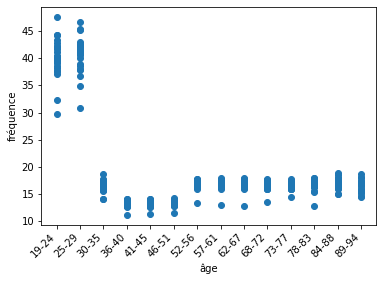

In [37]:
plt.plot(df_age_panier["âge_tranche"],df_age_panier["panier"],'o')
plt.xlabel("âge")
plt.ylabel("fréquence")
plt.xticks(rotation = 45,ha='right')
plt.show()

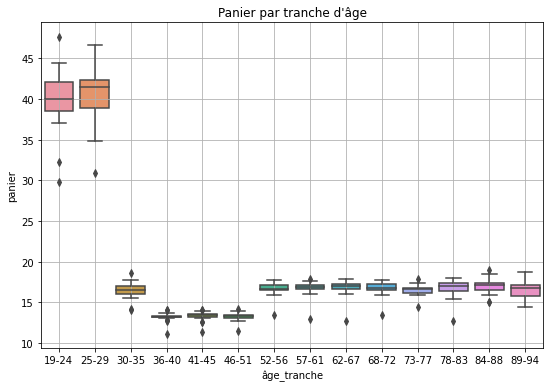

In [38]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='âge_tranche',y='panier',data=df_age_panier, showfliers=True)
plt.title('Panier par tranche d\'âge')
plt.grid()
plt.show()

In [39]:
lm_1 = ols('panier ~ âge_tranche', data = df_age_panier).fit()
import statsmodels.api; 
table_1 = sm.stats.anova_lm(lm_1)

In [40]:
table_1

,df,sum_sq,mean_sq,F,PR(>F)
âge_tranche,13.0,25474.406929,1959.569764,798.385548,4.795398e-236
Residual,322.0,790.321750,2.454415,NaN,NaN


In [41]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 panier   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     798.4
Date:                Mon, 27 Sep 2021   Prob (F-statistic):          4.80e-236
Time:                        10:20:06   Log-Likelihood:                -620.46
No. Observations:                 336   AIC:                             1269.
Df Residuals:                     322   BIC:                             1322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               40.0057      0.320    125.099      0.000      39.377      40.635
âge_tranche[T.25-29]     0.7299      0.452      1.614      0.108      -0.160       1.620
âge_tranche[T.30-35]   -23.5524      0.452    -52.078      0.000     -24.442     -22.663
âge_tranche[T.36-40]   -26.8203      0.452    -59.303      0.000     -27.710     -25.931
âge_tranche[T.41-45]   -26.6926      0.452    -59.021      0.000     -27.582     -25.803
âge_tranche[T.46-51]   -26.7927      0.452    -59.242      0.000     -27.682     -25.903
âge_tranche[T.52-56]   -23.3153      0.452    -51.553      0.000     -24.205     -22.426
âge_tranche[T.57-61]   -23.2816      0.452    -51.479      0.000     -24.171     -22.392
âge_tranche[T.62-67]   -23.2398      0.452    -51.386      0.000     -24.130     -22.350
âge_tranche[T.68-72]   -23.3812      0.452    -51.699      0.000     -24.271     -22.491
âge_tranche[T.73-77]   -23.5471      0.452    -52.066      0.000     -24.437     -22.657
âge_tranche[T.78-83]   -23.2680      0.452    -51.449      0.000     -24.158     -22.378
âge_tranche[T.84-88]   -23.0156      0.452    -50.891      0.000     -23.905     -22.126
âge_tranche[T.89-94]   -23.5056      0.452    -51.974      0.000     -24.395     -22.616
==============================================================================
Omnibus:                      174.123   Durbin-Watson:                   0.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3324.212
Skew:                          -1.682   Prob(JB):                         0.00
Kurtosis:                      18.038   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Avec un p-value inférieur à 0.05 %, on peut rejeter l'hypothèse H0 et un Eta² de 0.970 indique une forte corrélation entre les variables.

# Test de corrélation : Age et catégorie de produit

Je prends comme variable ma colonne age_tranche afin de faire un test de Khi²

In [42]:
df_age_categ = df[['âge_tranche','categ']]

In [43]:
# Je crée mon tableau de contingence
X = "âge_tranche"
Y = "categ"

cont_2 = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

categ,0,1,2,Total
âge_tranche,,,,
19-24,8601,14222,14997,37820
25-29,5813,9897,10763,26473
30-35,60527,21475,4441,86443
36-40,75737,23497,320,99554
41-45,83787,26260,450,110497
46-51,81656,25547,383,107586
52-56,19131,24421,402,43954
57-61,15614,20410,309,36333
62-67,15491,19485,349,35325


In [44]:
chi2_2, p_2, dof, exp = chi2_contingency(cont_2)

In [58]:
chi2_2

242695.9059372266

In [59]:
p_2

0.0

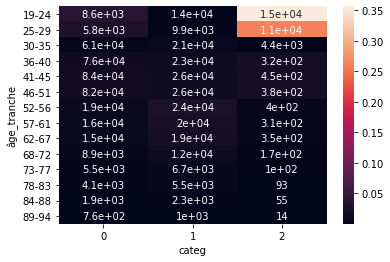

In [47]:
tx = cont_2.loc[:,["Total"]]
ty = cont_2.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = cont_2.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

Il y a une forte corrélation entre les personnes âgés de 19-24 ans et les 25-29 ans pour la catégorie 2 des produits.

# Probabilité

In [48]:
# Calcul du nombre de clients
client_total = df.client_id.nunique();
print(client_total)

8596


In [49]:
client_2_159 = df.loc[df['id_prod']=='2_159',]

In [50]:
client_2_159.client_id.nunique()

526

In [51]:
client_0_525 = df.loc[df['id_prod']=='0_525',]

In [52]:
client_0_525.client_id.nunique()

455

In [53]:
# Calcul de la probabilité qu'un client achète l'article 2_159 :
p_2_159 = 526/8596
print(p_2_159*100)

6.119125174499768


In [54]:
# Calcul de la probabilité qu'un client achète l'article 0_525 :
p_0_525 = 455/8596
print(p_0_525*100)

5.293159609120521


In [55]:
# Calcul de la probabilité qu'un client qui a acheté l'article 2_159 achète l'article 0_525 : 
p_2_articles = p_0_525/ p_2_159*100
print(p_2_articles)

86.50190114068441


In [56]:
# Il est aussi possible de trouver cette propabilité en divisant le nombre de personnes qui ont acheté l'article 0_525
# par le nombre de personnes qui ont acheté l'article 2_159:

455/526*100

86.50190114068441

##### 